In [12]:
import matplotlib.pyplot as plt
from pylibdmtx import pylibdmtx
import cv2

%matplotlib inline

In [13]:
def automatic_brightness_and_contrast(image, clip_hist_percent=1):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)

    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))  
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))

    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0

    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1

    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1

    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha

    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return auto_result

In [14]:
def preprocessImage(image):
    try:
        adjustedImage = automatic_brightness_and_contrast(image)
        return adjustedImage
    except:
        return image

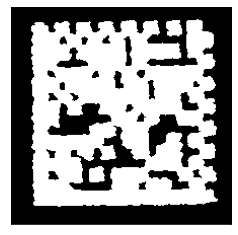

In [15]:
image = cv2.imread('./dpm-ex25.jpg', cv2.IMREAD_UNCHANGED);
image = preprocessImage(image)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.xticks([])
plt.yticks([])
plt.imshow(thresh, cmap="gray")

In [16]:
msg = pylibdmtx.decode(thresh)
print(msg)

[Decoded(data=b'15501120919120339', rect=Rect(left=23, top=18, width=177, height=183))]
